In [164]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..")
import dlzh.d2lzh_pytorch as d2l
from torch import nn
import torch.utils.data as Data

In [165]:
'''
生成数据集
使用y=1.2x-3.4x^2+5.6x^3+5+b生成样本标签
其中噪声项服从均值为0，std为0，01的标准正态分布
训练集和测试集数量都设置为100
'''
n_train,n_test,true_w,true_b=100,100,[1.2,3.4,5.6],5
#构造200*1的数据集
features=torch.randn((n_train+n_test,1))
#torch.cat 是 tensor拼接函数
'''在这里进行平方，三次方就可以避免在线性回归里再去处理数据'''
poly_features=torch.cat((features, torch.pow(features, 2),torch.pow(features, 3)), 1)
# labels=torch.matmul(poly_features,torch.tensor(true_w).view(-1,1))+true_b
#再加上一个噪音
labels = (true_w[0] * poly_features[:, 0] + true_w[1] *
poly_features[:, 1]
+ true_w[2] * poly_features[:, 2] + true_b)
# print(labels.t()[0],)
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=float)
# print(labels)

In [166]:

print(features[:2], poly_features[:2], labels[:2])


tensor([[-1.5237],
        [ 0.1638]]) tensor([[-1.5237,  2.3216, -3.5374],
        [ 0.1638,  0.0268,  0.0044]]) tensor([-8.7388,  5.3113])


final epoch: train loss 7.30121391825378e-05 test loss 9.432424849364907e-05
weight: tensor([[1.2009, 3.3995, 5.5999]]) 
bias: tensor([5.0007])


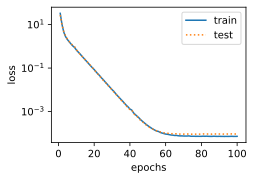

In [167]:
num_epochs,loss=100,torch.nn.MSELoss()


def fit_and_plot(train_features, test_features, train_labels,
test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)

    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features,
    train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size,
    shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features),
        train_labels).item())
        test_ls.append(loss(net(test_features),
        test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss',
    test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
    range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
'\nbias:', net.bias.data)


fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])


final epoch: train loss 0.000662463076878339 test loss 0.0008927198359742761
weight: tensor([[1.2295, 3.4090, 5.5938]]) 
bias: tensor([4.9788])


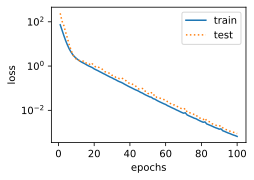

In [168]:
fit_and_plot(poly_features[0:50,:],poly_features[n_train:n_train+2,:],labels[0:50],labels[n_train:n_train+2])

